# MODUL 3

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

##### Script di atas berfungsi untuk memanggil library yang akan digunakan. Library pertama yaitu NumPy (alias np) adalah modul Python yang digunakan untuk melakukan komputasi numerik dan ilmiah. Kedua OpenCV (alias cv) adalah modul Python yang digunakan untuk pemrosesan citra dan penglihatan mesin. Dan terakhir yaitu Matplotlib (alias plt) adalah modul Python yang digunakan untuk membuat visualisasi data dalam bentuk grafik atau plot.

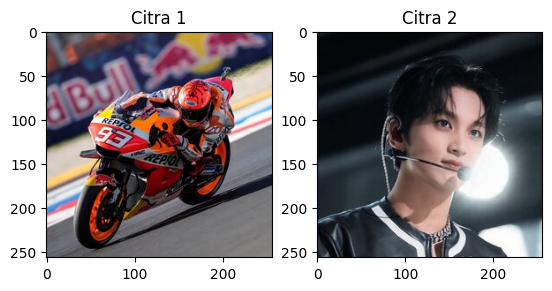

In [2]:
plt.subplot(121)
plt.title("Citra 1")
image = plt.imread("marc.jpg")
plt.imshow(image)

plt.subplot(122)
plt.title("Citra 2")
image2 = plt.imread("haechan.jpg")
plt.imshow(image2)

##### Script di atas berfungsi untuk memasukkan gambar ke dalam codingan 

### SOAL NOMOR 1
#### Tampilkan histogram dari citra 1

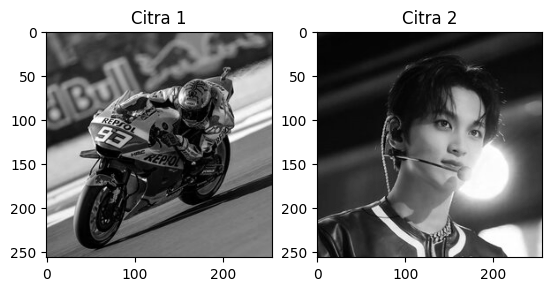

In [3]:
plt.subplot(121)
plt.title("Citra 1")
citra1 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(citra1, cmap = "gray")

plt.subplot(122)
plt.title("Citra 2")
citra2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
plt.imshow(citra2, cmap = "gray")
plt.show()

##### Script di atas berfungsi untuk mengubah warna gambar berwarna menjadi warna putih dan abu menggunakan script "cv.COLOR_RGB2GRAY"

<BarContainer object of 256 artists>

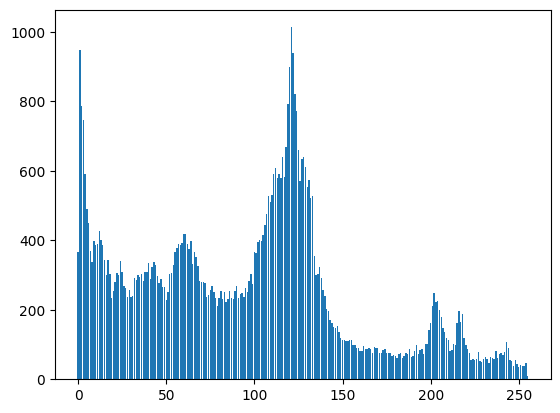

In [16]:
grayValue = [i for i in range(256)]
panjang, lebar = citra1.shape

def histogram(Image):
    sumGray = np.zeros(256).astype(int)
    
    for i in range(panjang):
        for j in range(lebar):
            value = Image[i, j]
            sumGray[value] += 1
    return sumGray

plt.bar(grayValue,histogram(citra1))

#### script di atas melakukan iterasi dari 0 sampai sebelum 256 untuk menghasilkan angka 0-255 yaitu rentang gray level dari soal yang diberikan, serta menampilkan isi list dari grayvalue tersebut. script di atas berfungsi untuk memanggil fungsi bar dari plt untuk membuat sebuah histogram yang berisikan nilai dari grayvalue dan sumGray serta menampilkannya

### SOAL NOMOR 2
#### Lakukan ekualisasi histogram pada citra 1 dan tampilkan citra hasil ekualisasinya

<BarContainer object of 256 artists>

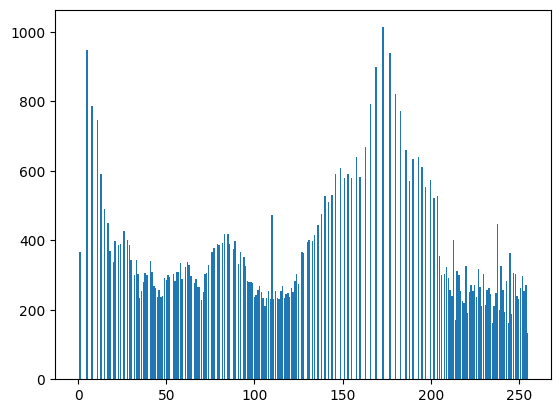

In [19]:
panjang, lebar = citra1.shape
sumGray = histogram(citra1)
probabilitas = np.zeros(256)

for i in range(256):
    probabilitas[i] = sumGray[i] / (panjang * lebar)

sumNew = np.zeros(256)
sumNew[0] = probabilitas[0]

for i in range(1, 256):
    sumNew[i] = sumNew[i - 1] + probabilitas[i]

newGray = citra1.copy()
for i in range(panjang):
    for j in range(lebar):
        pixel = citra1[i, j]
        newPixel = round(sumNew[pixel] * 255)
        newGray[i, j] = newPixel

plt.bar(grayValue, histogram(newGray))


script diatas merupakan implementasi dari algoritma Histogram Equalization pada citra grayscale dengan menggunakan library NumPy dan Matplotlib.
Pada bagian pertama, citra grayscale (citra1) dihitung histogramnya (sumGray) untuk menghitung kemunculan intensitas piksel dari 0 hingga 255. Kemudian, probabilitas kemunculan tiap intensitas piksel dihitung dengan membagi kemunculan tiap intensitas dengan ukuran citra (panjang x lebar).
Pada bagian kedua, dilakukan akumulasi probabilitas dari intensitas piksel yang lebih rendah ke lebih tinggi untuk mendapatkan fungsi transformasi kumulatif (sumNew).
Pada bagian ketiga, fungsi transformasi kumulatif tersebut digunakan untuk melakukan transformasi citra ke citra baru (newGray) dengan memetakan tiap intensitas piksel pada citra awal ke intensitas baru sesuai dengan sumNew. Kemudian, histogram citra baru juga dihitung dan ditampilkan menggunakan library Matplotlib.

### SOAL NOMOR 3
#### Lakukan spesifikasi/matching histogram pada citra 1 berdasarkan pada histogram citra 2.

<BarContainer object of 256 artists>

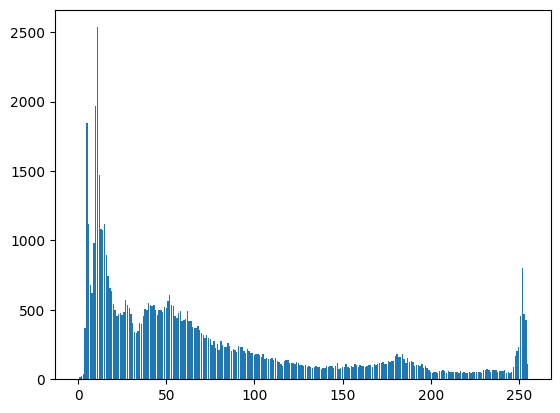

In [20]:
panjang, lebar = citra2.shape
plt.bar(grayValue, histogram(citra2))

script diatas berfungsi menampilkan histogram citra grayscale dengan menggunakan fungsi plt.bar(). fungsi histogram() digunakan untuk menghitung nilai piksel diseluruh rentang nilai piksel (0-255), sedangkan plt.bar digunakan untuk menampilkan histogram tersebut dalam bentuk grafik batang

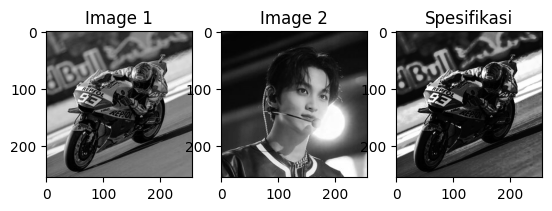

In [30]:
histogram1 = np.zeros((256, ))
histogram2 = np.zeros((256, ))

for i in range(citra1.shape[0]):
    for j in range(citra1.shape[1]):
        histogram1[citra1[i, j]] += 1

for i in range(citra2.shape[0]):
    for j in range(citra2.shape[1]):
        histogram2[citra2[i, j]] += 1

normalisasi1 = histogram(citra1) / (panjang * lebar)
normalisasi2 = histogram(citra2) / (panjang * lebar)

cdf1 = np.zeros(256)
cdf2 = np.zeros(256)

for i in range(256):
    if i == 0:
        cdf1[i] = normalisasi1[i]
        cdf2[i] = normalisasi2[i]
    else:
        cdf1[i] = cdf1[i - 1] + normalisasi1[i]
        cdf2[i] = cdf2[i - 1] + normalisasi2[i]

mapping = np.zeros(256)
for i in range(256):
    j = 0
    while cdf2[j] < cdf1[i] and j < 255:
        j += 1
    mapping[i] = j

grayImage_marc_spec = np.zeros_like(citra1)
for i in range(panjang):
    for j in range(lebar):
        grayImage_marc_spec[i,j] = mapping[citra1[i,j]]

plt.subplot(131), plt.imshow(citra1, cmap = 'gray'), plt.title('Image 1')
plt.subplot(132), plt.imshow(citra2, cmap = 'gray'), plt.title('Image 2')
plt.subplot(133), plt.imshow(grayImage_marc_spec, cmap = 'gray'), plt.title('Spesifikasi')
plt.show()

script diatas berfungsi untuk membuat array kosong berukuran 256 yaitu histogram1 dan histogram2 yang digunakan untuk menghitung histogram masing. melakukan looping untuk menghitung histogran gambar pertama yaitu citra1 dan citra2. melakukan proses noermalisasi histogram pada kedua gambar dengan membagi setiap nilai pada histogram dengan total piksel gambar panjang * lebar. melakukan proses komulative distribution function (CDF) pada kedua gambar. loong ini melakukan CFD dari 0 sampai 255. pada iterasi pertama i =0, nilai CDFuntuk setiap gambar diisi dengan nilai normalisasi histogram pada intensitas 0. pada iterasi berikutnya, nilai CDF dihitung dengan menambahkan nilai CDF pada intensitas sebelumnya dengan nilai normalisasi histogram pada intensitas tersebut. melakukan proses perhitungan mapping, yaitu menghilangkan nilai intensitas baru pada gambar pertama berdasarkan nilai intensitas pada gambar kedua.looping berfungsi untuk menghitung nilai intensitas baru pada gambar pertama (mapping) pada setiap nilai intensitas pada gambar kedua, sehingga gambar pertama akan memiliki histogram yang sama dengan gambar kedua